## Project Pipeline

* Student name: Tom Cheng, Aidi Li, Jesse Zhai, Andy Zhou, Grey Zhang
* Scheduled project review date: 25 July 2019
* Instructor name: Pro.pavlos protopapas, Patrick Ohiomoba, Esteban Reyes

***

# Contents

1. Introduction and project aims
2. The dataset
3. Cleaning and pre-processing
4. Exploratory data analysis
5. Traning data

# 1.Introduction and project aims

Residential renting is an important process in most of the communities. Some slight differences in the prices might cause severe affections on people’s life. Because of the huge amount of data, the pricing process is not short nor simple. The aim of this project is to use machine learning algorithms to create the best model that predicts property rental prices in Washington D.C. downtown.

# 2.The dataset

The dataset comes from http://insideairbnb.com. The dataset was scraped on 15 July 2019 and contains information on all Washington D.C. Airbnb listings that were live on the site on that date. The data is disorganized, with a lot of null values and useless features. For example, some data are set by the hosts who do not know much about Airbnb, and therefore cannot be used. However, the dataset have some really good features, so we need to clean the data initially.

# 3.Cleaning and pre-processing

In [1]:
# Importing the libraries and data
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
import missingno
from sklearn.linear_model import LinearRegression
from keras import models
from keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

Using TensorFlow backend.
C:\Users\77350\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 3.1 Read data and check it

In [2]:
raw_df = pd.read_csv(r"C:\Users\77350\Desktop\AI Hub\listingsDC.csv")
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 9126 Airbnb listings


C:\Users\77350\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3344,https://www.airbnb.com/rooms/3344,20190715000728,2019-07-15,"White House/Center City, 1 roommate",This listing is for one roommate in a 2BR/2BA ...,"You have found The One, but be sure to message...",This listing is for one roommate in a 2BR/2BA ...,none,This is the hottest neighborhood in D.C. at th...,The condo is bright and clean. All friends and...,The Circulator bus to Georgetown and Union sta...,"Gym on main floor inside condo building, small...",I am out of state on my job four days out of e...,Please always message me before you book the s...,NaN,NaN,https://a0.muscache.com/im/pictures/18033/45c9...,NaN,4957,https://www.airbnb.com/users/show/4957,A.J.,2008-12-10,"Washington, District of Columbia, United States","Cordial, considerate host who keeps out of the...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/4957/profile_...,https://a0.muscache.com/im/users/4957/profile_...,Downtown/Penn Quarter,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Washington, DC, United States",Downtown/Penn Quarter,"Downtown, Chinatown, Penn Quarters, Mount Vern...",NaN,Washington,DC,20005,D.C.,"Washington, DC",US,United States,38.90126,-77.02857,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$48.00,$480.00,"$1,495.00",$110.00,NaN,1,$25.00,306,720,306,306,720,720,306.0,720.0,3 months ago,t,28,58,88,363,2019-07-15,11,0,2009-05-09,2016-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",f,f,moderate,f,f,2,1,1,0,0.09
1,3362,https://www.airbnb.com/rooms/3362,20190715000728,2019-07-15,"Convention Center Rowhouse & In Law: 2 Units, 4BR",An architect-designed rowhouse featuring a lar...,This listing features our 19th century Victori...,An architect-designed rowhouse featuring a lar...,none,NaN,NaN,The best part of living in Shaw is that you're...,Guests will have access to the entire three-le...,"We look for responsible, independent guests wh...",- Be respectful of our neighbors (no loud musi...,NaN,NaN,https://a0.muscache.com/im/pictures/18666/06da...,NaN,2798,https://www.airbnb.com/users/show/2798,Ayeh,2008-09-07,"Washington, District of Columbia, United States",I love the District and sharing all the local ...,within an

### 3.2 Dropping initial useless columns

In [3]:
raw_df.columns
len(raw_df.columns)

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9126 entries, 0 to 9125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 7.4+ MB


In [4]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)


In [5]:
df.isna().sum()

id                                                 0
experiences_offered                                0
host_since                                         4
host_response_time                              2533
host_response_rate                              2533
host_acceptance_rate                            9126
host_is_superhost                                  4
host_listings_count                                4
host_total_listings_count                          4
host_has_profile_pic                               4
host_identity_verified                             4
street                                             0
neighbourhood                                      0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    9126
city                                               3
state                                             12
zipcode                                          184
market                                        

In [6]:
# Other columns can be dropped because they contain a majority of null entries.
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names'], axis=1, inplace=True)

df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one

In [7]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:10]

4


,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14570,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC, United States",Downtown/Penn Quarter,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Washington,DC,20001,D.C.,"Washington, DC",US,United States,38.90427,-77.02656,t,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$85.00,$175.00,$35.00,1,$15.00,3,30,3,3,30,30,3.0,30.0,3 days ago,t,4,4,4,4,547,45,2010-02-03,2019-07-10,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,t,t,1,0,1,0,4.76
3890435,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC, United States",Petworth,"Brightwood Park, Crestwood, Petworth",Washington,DC,20011,D.C.,"Washington, DC",US,United States,38.93851,-77.02440,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$69.00,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,46 months ago,t,0,0,0,0,2,0,2015-09-18,2015-09-21,80.0,9.0,6.0,10.0,10.0,9.0,9.0,f,f,f,flexible,f,f,1,0,1,0,0.04
15218873,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC, United States",Capitol Hill,"Capitol Hill, Lincoln Park",Washington,DC,20003,D.C.,"Washington, DC",US,United States,38.88407,-77.00476,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Free street parki...",$125.00,NaN,$60.00,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,2 months ago,t,30,60,89,89,128,47,2016-09-27,2019-07-12,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,f,f,1,1,0,0,3.76
26388411,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Washington, DC, United States",Mount Pleasant,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",Washington,DC,20010,D.C.,"Washington, DC",US,United States,38.93074,-77.03833,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$80.00,NaN,NaN,1,$0.00,3,30,3,3,30,30,3.0,30.0,12 months ago,t,0,0,0,0,6,4,2018-07-04,2018-08-26,88.0,10.0,8.0,8.0,9.0,9.0,10.0,f,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.48


In [8]:
# There are multiple columns for property location,some of these columns can be dropped. Because all of the listings are in DC, 
# Latitude and longitude will be saved in a dataframe for later use (see modelling section below).
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [9]:
df.drop(['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [10]:
# checking missing value and drop column which has large na value
df.isna().sum()

experiences_offered                    0
host_since                             4
host_response_time                  2533
host_response_rate                  2533
host_is_superhost                      4
host_listings_count                    4
host_has_profile_pic                   4
host_identity_verified                 4
neighbourhood_cleansed                 0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              9
bedrooms                               4
beds                                   8
bed_type                               0
amenities                              0
price                                  0
security_deposit                    2973
cleaning_fee                        1691
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated

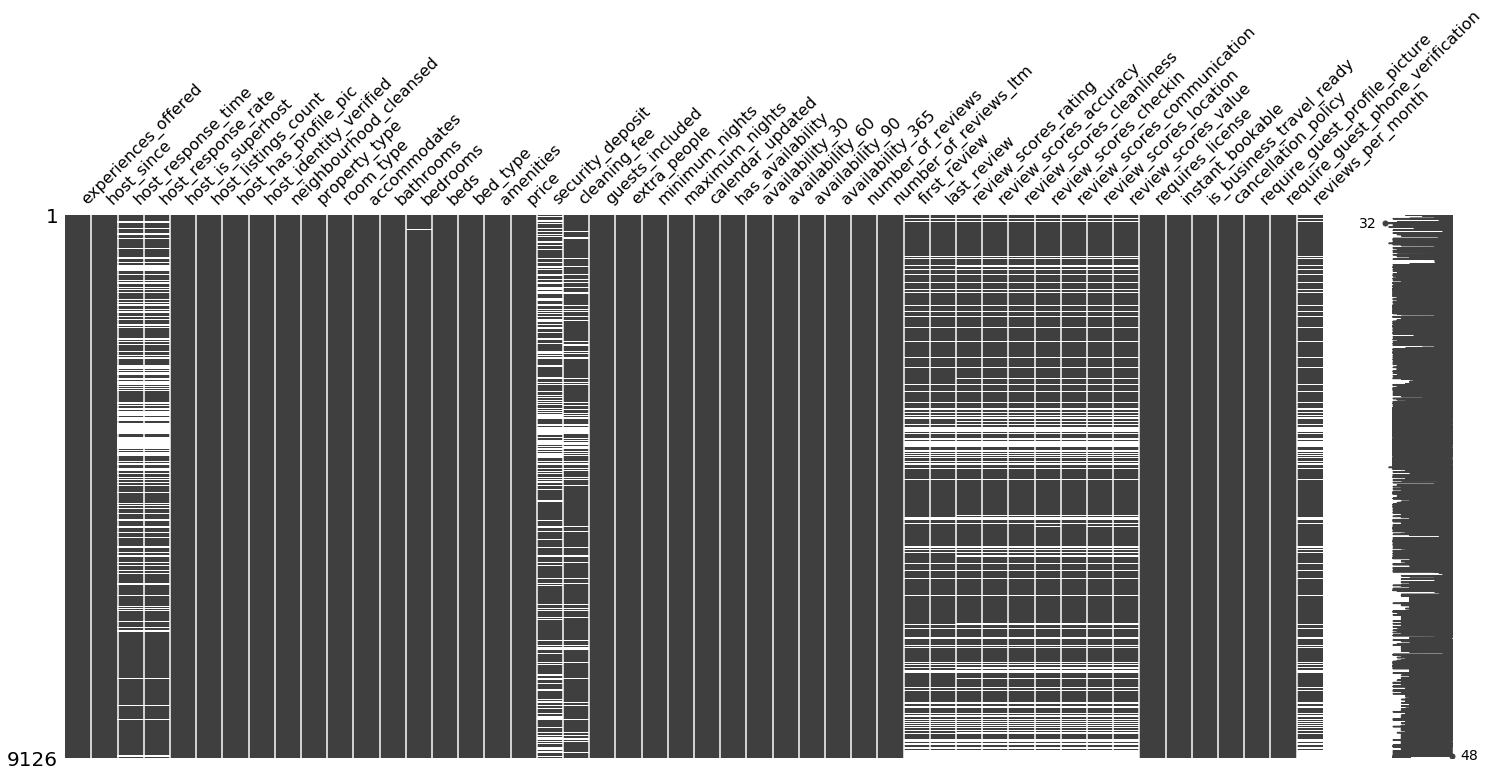

In [11]:
# checking missing columns again
missingno.matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266C1879630>,
      dtype=object)

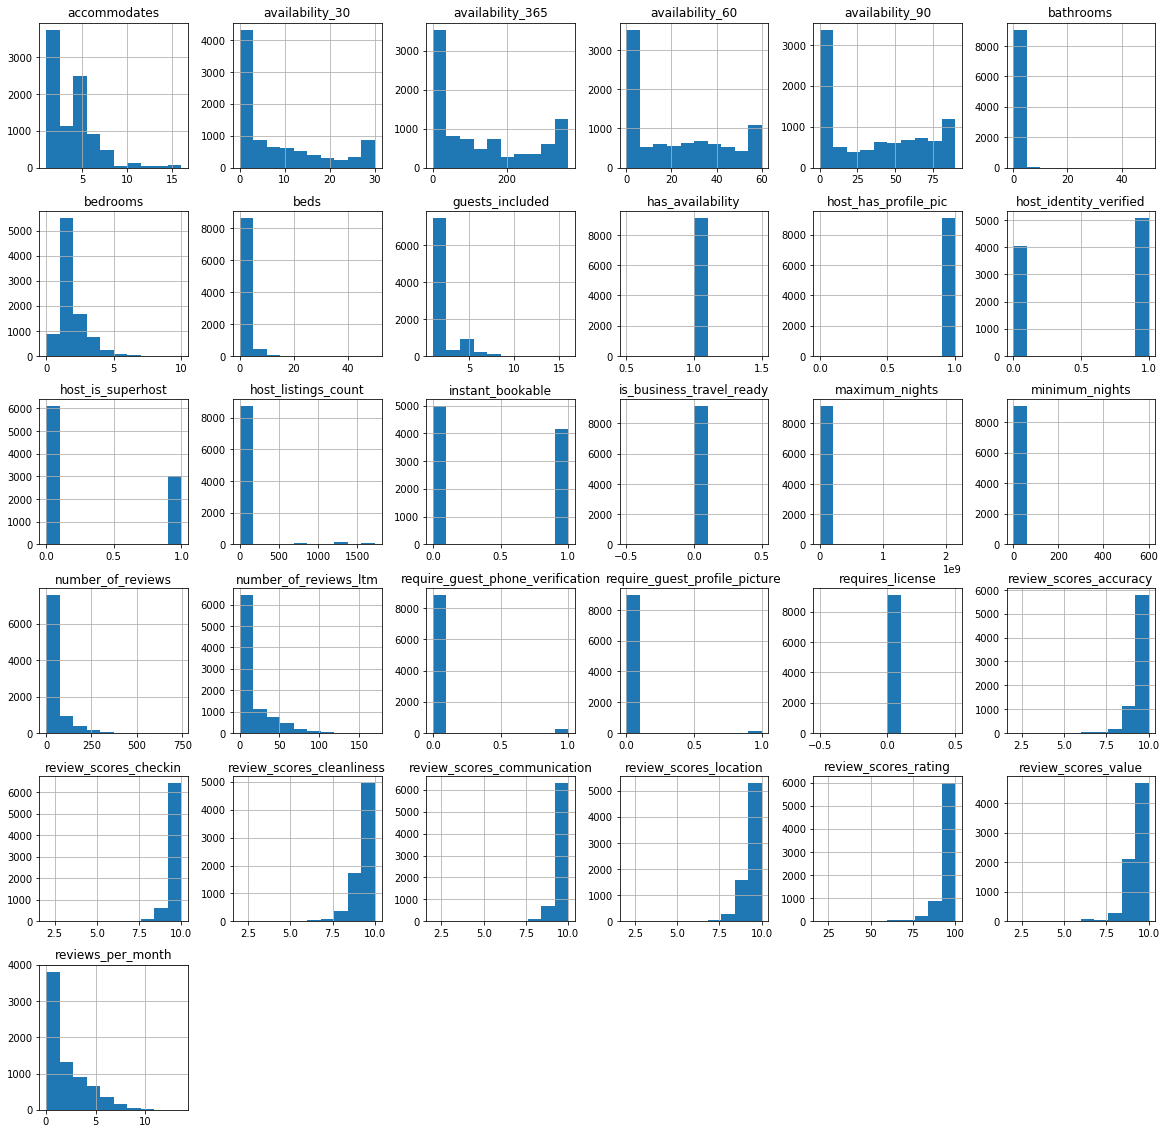

In [12]:
# df.hist(figsize=(100,100))
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)
# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))


In [13]:
# From the above, it can be seen that several columns only contain one category and can be dropped:
df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

### 3.3 Cleaning individual columns

**3.3.1 experiences_offered**

In [14]:
# Most listings offer no experiences so this feature can be dropped.
df.experiences_offered.value_counts()

none    9126
Name: experiences_offered, dtype: int64

In [15]:
df.drop('experiences_offered', axis=1, inplace=True)

In [16]:
# This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (9 April 2019). The original column will be left in initially for EDA, and dropped later?
df.head(2)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3344,2008-12-10,within a few hours,100%,0.0,2.0,0.0,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$48.00,$110.00,NaN,1,$25.00,306,720,3 months ago,28,58,88,363,11,0,2009-05-09,2016-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0.09
3362,2008-09-07,within an hour,100%,0.0,5.0,1.0,"Shaw, Logan Circle",Townhouse,Entire home/apt,16,3.5,4.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$433.00,$500.00,$202.00,8,$24.00,2,365,4 days ago,10,35,59,321,165,22,2009-01-21,2019-06-30,95.0,9.0,9.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1.29


In [17]:
df.host_since = pd.to_datetime(df.host_since)

In [18]:
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)
df.head(2)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,borough,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3344,2008-12-10,within a few hours,100%,0.0,2.0,0.0,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$48.00,$110.00,NaN,1,$25.00,306,720,3 months ago,28,58,88,363,11,0,2009-05-09,2016-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0.09
3362,2008-09-07,within an hour,100%,0.0,5.0,1.0,"Shaw, Logan Circle",Townhouse,Entire home/apt,16,3.5,4.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$433.00,$500.00,$202.00,8,$24.00,2,365,4 days ago,10,35,59,321,165,22,2009-01-21,2019-06-30,95.0,9.0,9.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1.29


In [19]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2019, 4, 9) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1504.0
Median days as host: 1449.0


**3.3.2 host response time and rate**

In [20]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[ :,['host_response_time ', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 2533
Proportion: 27.8%


C:\Users\77350\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


1828

In [21]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.502959
unknown               0.277559
within a few hours    0.149244
within a day          0.057857
a few days or more    0.012382
Name: host_response_time, dtype: float64

In [22]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 2533
Proportion: 27.8%


In [23]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 96.0
Median host response rate: 100.0
Proportion of 100% host response rates: 74.6%


In [24]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       4921
unknown    2533
90-99%      834
50-89%      680
0-49%       158
Name: host_response_rate, dtype: int64

In [25]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_since ', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

C:\Users\77350\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


4

In [26]:
df.dropna(subset=['host_since'], inplace=True)

**3.3.3 property type and cancellation policy**

In [27]:
df.property_type.value_counts()

Apartment             4116
House                 1910
Townhouse             1435
Condominium            787
Guest suite            492
Serviced apartment      98
Bed and breakfast       63
Loft                    58
Guesthouse              45
Other                   44
Hostel                  25
Bungalow                17
Villa                    7
Boutique hotel           5
Aparthotel               4
Boat                     3
Cottage                  3
Hotel                    2
Resort                   2
Tiny house               2
Barn                     2
Dome house               2
Name: property_type, dtype: int64

In [28]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [29]:
df.cancellation_policy.value_counts()

moderate                       3086
strict_14_with_grace_period    2972
flexible                       2893
strict                          115
super_strict_60                  52
super_strict_30                   4
Name: cancellation_policy, dtype: int64

In [30]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

**3.3.4 bathrooms, bedrooms and beds**

In [31]:
# Missing values will be replaced with the median (to avoid strange fractions).
for col in [ 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [32]:
# Most listings have the same bed type so this feature can be dropped.
df.bed_type.value_counts()

Real Bed         8989
Pull-out Sofa      62
Airbed             31
Futon              30
Couch              10
Name: bed_type, dtype: int64

In [33]:
df.drop('bed_type', axis=1, inplace=True)

**3.3.4 splilit amenities**

In [34]:
#amenities listed
df.amenities[:1].values

array(['{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,Doorman,Gym,Breakfast,Elevator,"Buzzer/wireless intercom",Heating,"Suitable for events",Washer,Dryer,"Smoke detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,Iron,"Laptop friendly workspace","Hot water","Long term stays allowed","Host greets you","Paid parking on premises"}'],
      dtype=object)

In [35]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',
 'Ethernet con

In [36]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\77350\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [37]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# # Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
# infrequent_amenities = []
# for col in df.iloc[:,41:].columns:
#     if df[col].sum() < len(df)/10:
#         infrequent_amenities.append(col)
# print(infrequent_amenities)

# Dropping infrequent amenity features
# df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

In [38]:
df.columns[40:]

Index(['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'smoking_allowed',
       'accessible', 'event_suitable'],
      dtype='object')

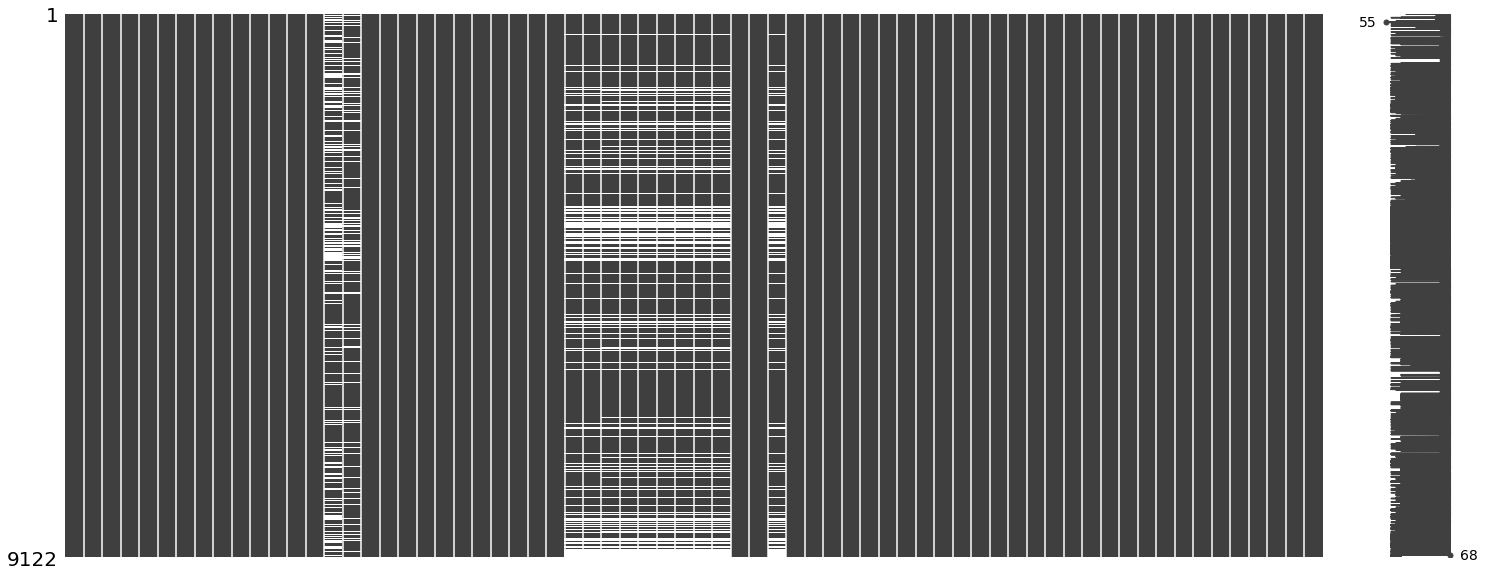

In [39]:
missingno.matrix(df)


**3.3.5 missing value**

In [40]:
# Price will be converted to an integer - currently it is a string because there is a currency sign.
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [41]:
df.security_deposit.isna().sum()

2970

In [42]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [43]:
df.cleaning_fee.isna().sum()

1689

In [44]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [45]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [46]:
print("Number of categories:", df.calendar_updated.nunique())
print("\nTop five categories:")
df.calendar_updated.value_counts()[:5]

Number of categories: 73

Top five categories:


today           1923
2 weeks ago      541
2 months ago     516
a week ago       484
3 weeks ago      399
Name: calendar_updated, dtype: int64

In [47]:
df.drop(['calendar_updated','availability_365'], axis=1, inplace=True)

**3.3.6 reviews column**

In [48]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 20.0%
Null values in 'review_scores_rating': 21.1%


In [49]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')

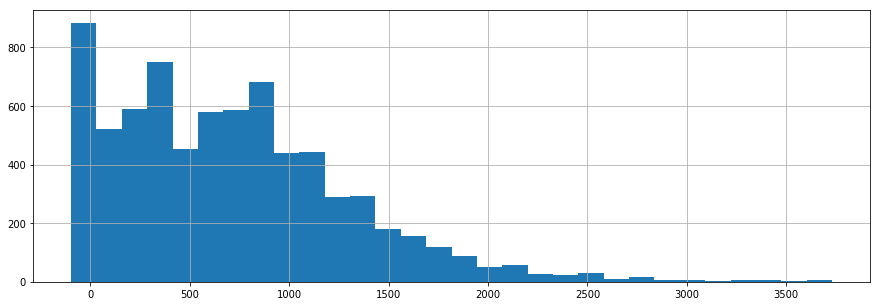

In [50]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [51]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [52]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [53]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime,The same process will be followed for last_review:

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

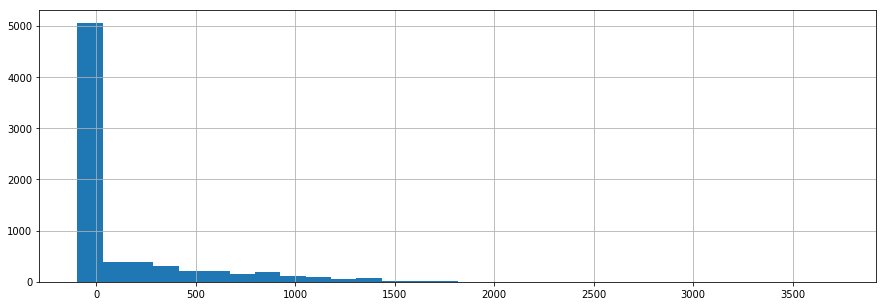

In [54]:
# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [55]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [56]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

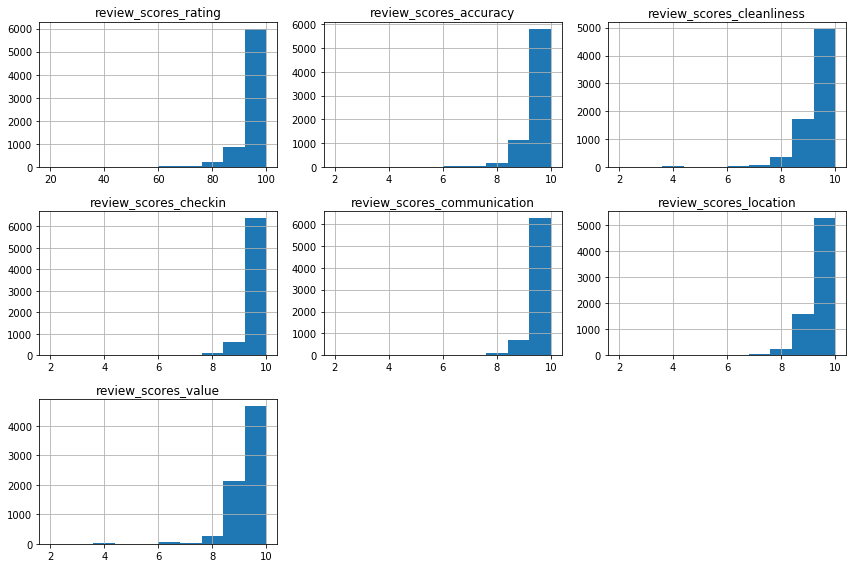

In [57]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [58]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [59]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [60]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [61]:
df.drop(['reviews_per_month','first_review','host_since'],axis=1, inplace=True)

# 4 Exploratory data analysis

### 4.1 Numerical features

In [62]:
df.describe()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,host_days_active,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
count,9122.000000,9122.000000,9122.000000,9122.000000,9113.000000,9122.000000,9122.00000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9.122000e+03,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000
mean,0.332274,56.677812,0.556128,3.714098,1.358609,1.387086,1.94727,203.036176,147.828546,60.922166,1.845977,12.845977,5.658518,2.481271e+05,7.924468,21.280750,35.525323,37.551414,14.627604,0.455492,1503.690638,0.168932,0.958123,0.018417,0.099868,0.172440,0.004824,0.379522,0.114558,0.835562,0.384346,0.348937,0.859132,0.180991,0.131112,0.450340,0.614777,0.155448,0.064460,0.075641,0.978294,0.305196,0.206424,0.393006,0.145363,0.478952,0.024118,0.065008,0.043850
std,0.471054,254.403748,0.496867,2.362508,0.852749,0.983261,1.54612,333.712767,340.347868,63.477451,1.539403,23.277589,20.257165,2.250906e+07,9.879789,21.098305,32.897956,61.721651,22.210611,0.498042,762.602039,0.374713,0.200319,0.134461,0.299841,0.377783,0.069288,0.485295,0.318505,0.370693,0.486467,0.476660,0.347905,0.385032,0.337541,0.497555,0.486675,0.362351,0.245583,0.264438,0.145729,0.460516,0.404761,0.488445,0.352486,0.499584,0.153422,0.246553,0.204773
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,79.250000,0.000000,10.000000,1.000000,0.000000,1.000000,3.000000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,972.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,119.000000,0.000000,50.000000,1.000000,0.000000,2.000000,1.125000e+03,3.000000,16.000000,33.000000,11.000000,3.000000,0.000000,1449.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,5.000000,1.500000,2.000000,2.00000,198.750000,200.000000,90.000000,2.000000,20.000000,3.000000,1.125000e+03,14.000000,39.000000,65.000000,47.000000,21.000000,1.000000,2024.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.

In [63]:
print(f"Nightly advertised prices range from £{min(df.price)} to £{max(df.price)}.")

Nightly advertised prices range from £10 to £10000.


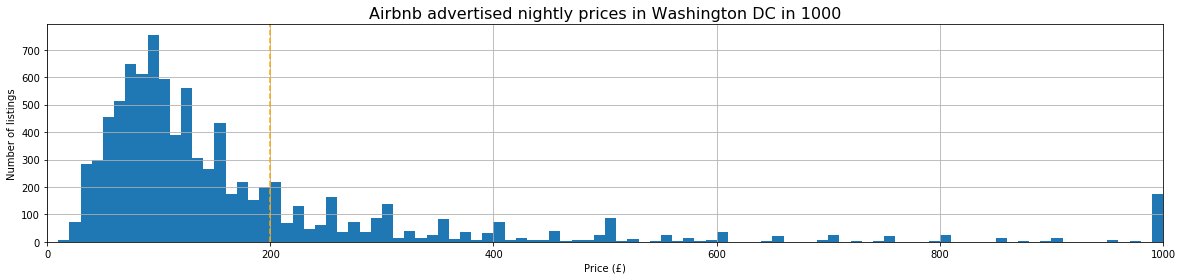

In [64]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Washington DC in 1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

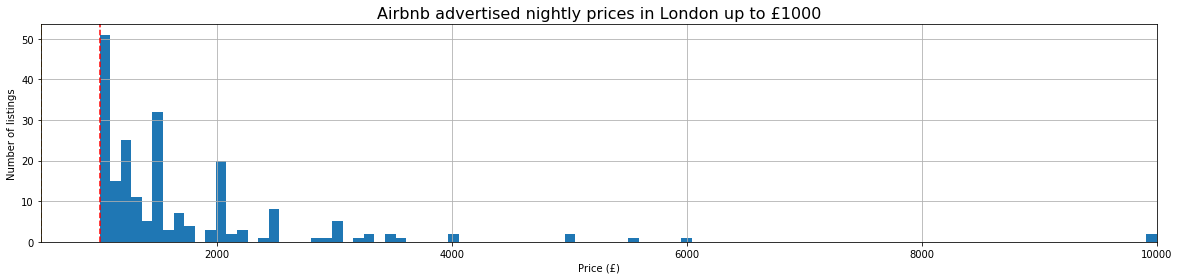

In [65]:
# Distribution of prices from £200 upwards
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(1000, max(df.price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in London up to £1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

In [66]:
# Replacing values under £10 with £10
df.loc[df.price <= 10, 'price'] = 10

# Replacing values over £1000 with £1000
df.loc[df.price >= 1000, 'price'] = 1000

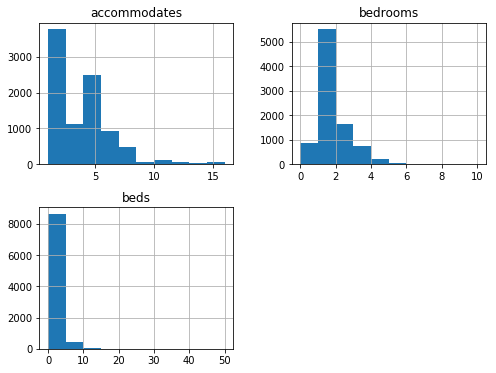

In [67]:
df[['accommodates', 'bedrooms', 'beds']].hist(figsize=(8,6));

### 4.2 Categorical features

In [68]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

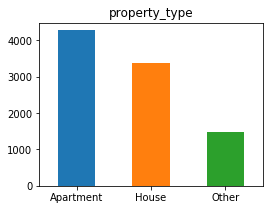

Apartment    0.468318
House        0.369875
Other        0.161807
Name: property_type, dtype: float64


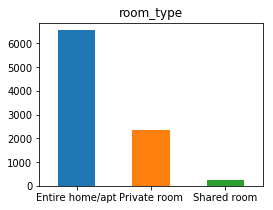

Entire home/apt    0.717606
Private room       0.257838
Shared room        0.024556
Name: room_type, dtype: float64


In [69]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

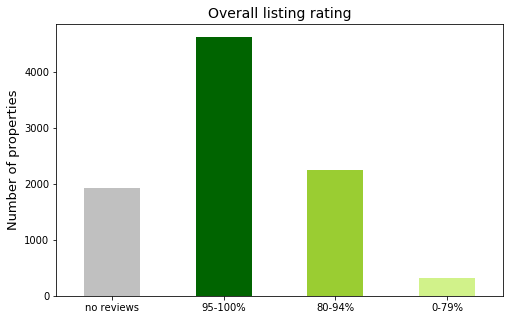

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

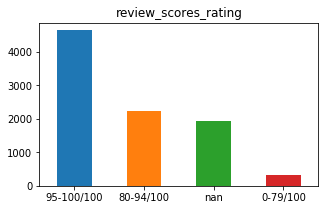

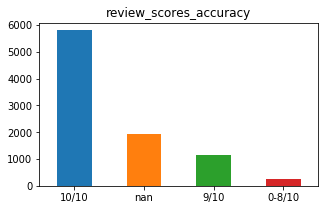

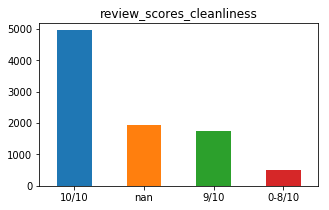

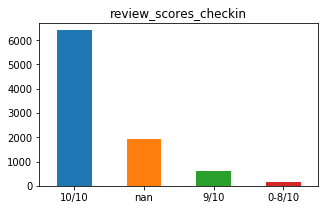

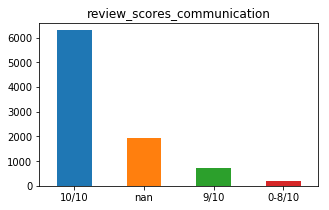

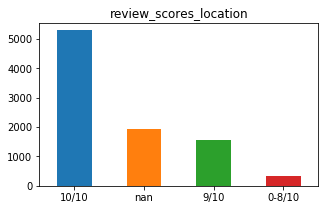

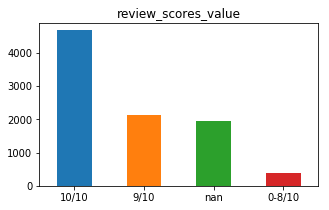

In [71]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

### 4.3 check data and correlations

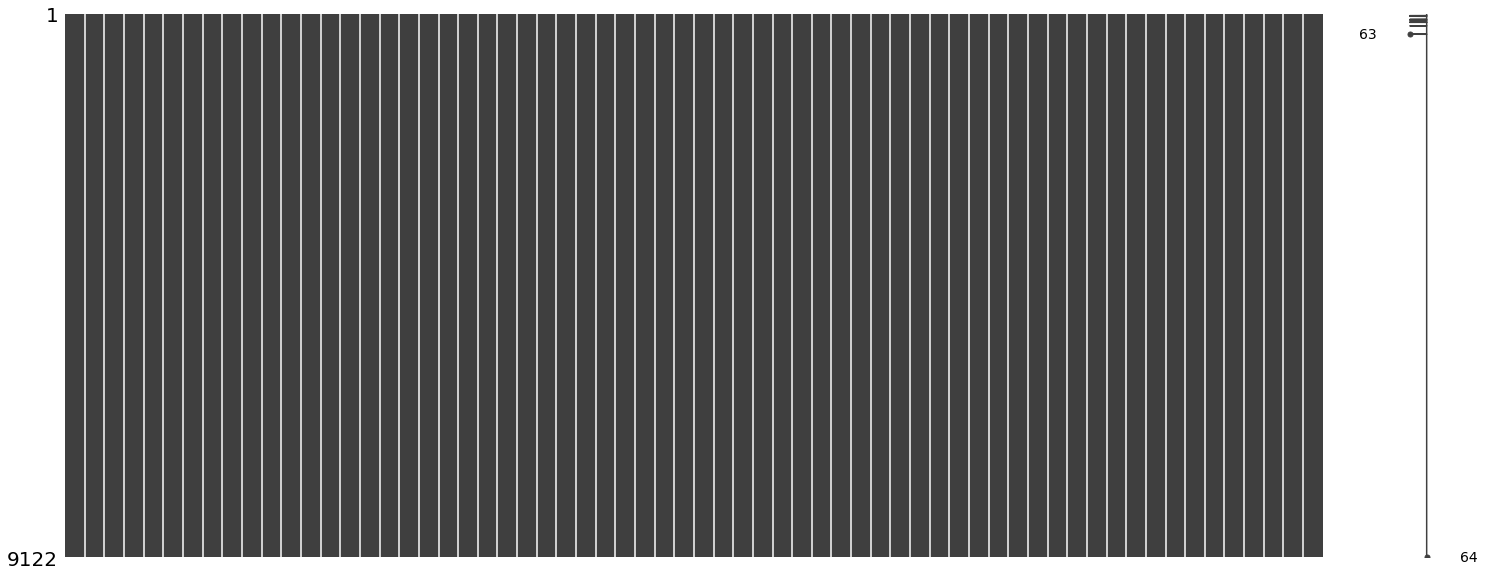

In [72]:
missingno.matrix(df)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 3344 to 36731350
Data columns (total 64 columns):
host_response_time             9122 non-null object
host_response_rate             9122 non-null object
host_is_superhost              9122 non-null float64
host_listings_count            9122 non-null float64
host_identity_verified         9122 non-null float64
borough                        9122 non-null object
property_type                  9122 non-null object
room_type                      9122 non-null object
accommodates                   9122 non-null int64
bathrooms                      9113 non-null float64
bedrooms                       9122 non-null float64
beds                           9122 non-null float64
price                          9122 non-null int64
security_deposit               9122 non-null int64
cleaning_fee                   9122 non-null int64
guests_included                9122 non-null int64
extra_people                   9122 non-null int64
mi

In [74]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

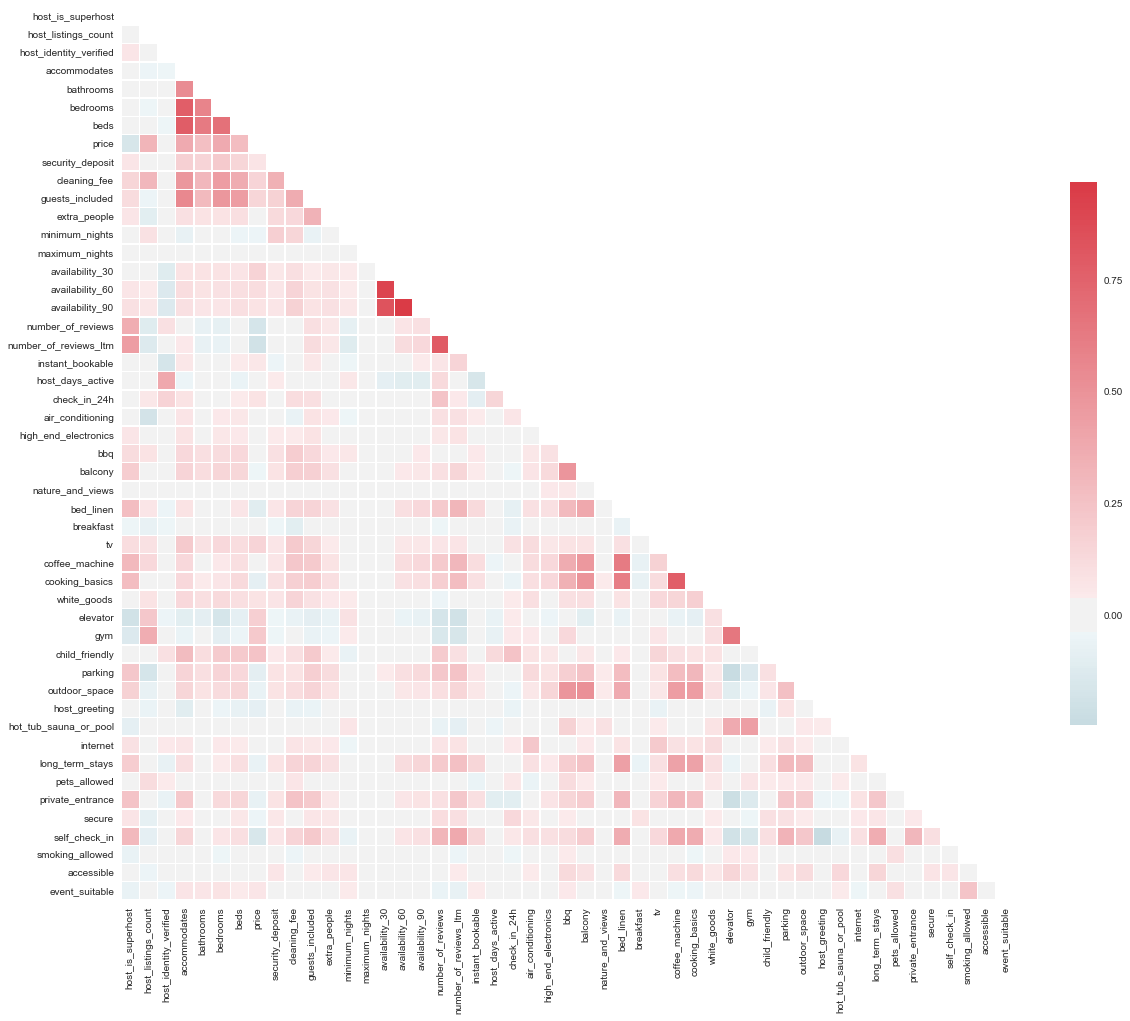

In [75]:
multi_collinearity_heatmap(df, figsize=(20,20))

In [76]:
'neighbourhood_cleansed',# Dropping collinear and not important features
df.drop(['host_response_time','host_response_rate','host_listings_count','beds','security_deposit','cleaning_fee','guests_included','number_of_reviews_ltm','minimum_nights','maximum_nights','availability_30','availability_60','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','host_days_active','time_since_last_review','time_since_first_review','event_suitable','accessible','self_check_in','smoking_allowed','outdoor_space','bbq','long_term_stays','hot_tub_sauna_or_pool','host_greeting','child_friendly','bed_linen','white_goods','breakfast','high_end_electronics'],axis=1,inplace=True)


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 3344 to 36731350
Data columns (total 28 columns):
host_is_superhost         9122 non-null float64
host_identity_verified    9122 non-null float64
borough                   9122 non-null object
property_type             9122 non-null object
room_type                 9122 non-null object
accommodates              9122 non-null int64
bathrooms                 9113 non-null float64
bedrooms                  9122 non-null float64
price                     9122 non-null int64
extra_people              9122 non-null int64
availability_90           9122 non-null int64
number_of_reviews         9122 non-null int64
review_scores_rating      9122 non-null object
cancellation_policy       9122 non-null object
check_in_24h              9122 non-null float64
air_conditioning          9122 non-null float64
balcony                   9122 non-null float64
nature_and_views          9122 non-null float64
tv                        9122 non-nu

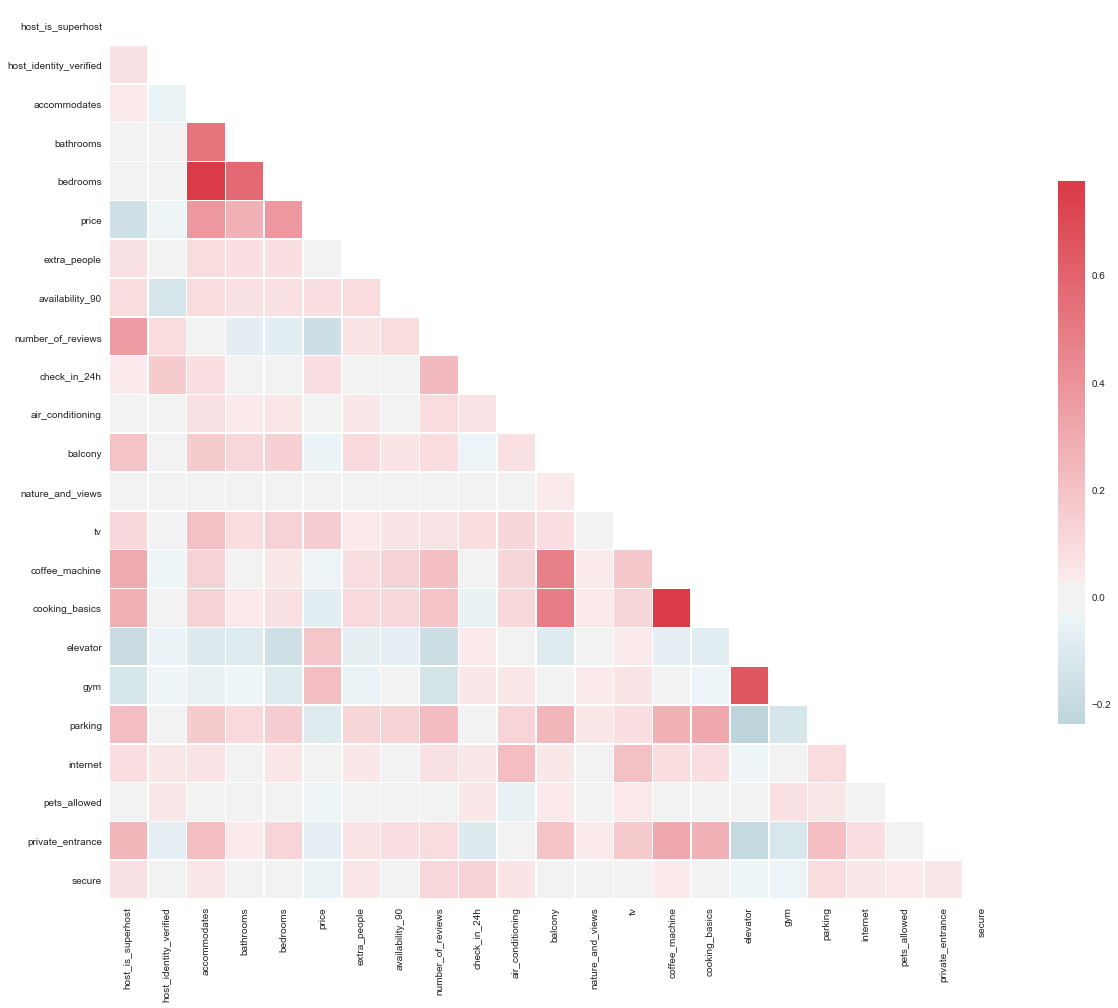

In [78]:
multi_collinearity_heatmap(df, figsize=(20,20))

In [79]:
df.bathrooms.fillna(1, inplace=True)
df.extra_people = df.extra_people.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 3344 to 36731350
Data columns (total 28 columns):
host_is_superhost         9122 non-null float64
host_identity_verified    9122 non-null float64
borough                   9122 non-null object
property_type             9122 non-null object
room_type                 9122 non-null object
accommodates              9122 non-null int64
bathrooms                 9122 non-null float64
bedrooms                  9122 non-null float64
price                     9122 non-null int64
extra_people              9122 non-null int64
availability_90           9122 non-null int64
number_of_reviews         9122 non-null int64
review_scores_rating      9122 non-null object
cancellation_policy       9122 non-null object
check_in_24h              9122 non-null float64
air_conditioning          9122 non-null float64
balcony                   9122 non-null float64
nature_and_views          9122 non-null float64
tv                        9122 non-nu

,host_is_superhost,host_identity_verified,borough,property_type,room_type,accommodates,bathrooms,bedrooms,price,extra_people,availability_90,number_of_reviews,review_scores_rating,cancellation_policy,check_in_24h,air_conditioning,balcony,nature_and_views,tv,coffee_machine,cooking_basics,elevator,gym,parking,internet,pets_allowed,private_entrance,secure
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3344,0.0,0.0,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Other,Private room,1,1.0,1.0,48,25,88,11,95-100/100,moderate,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3362,0.0,1.0,"Shaw, Logan Circle",House,Entire home/apt,16,3.5,4.0,433,24,59,165,80-94/100,strict_14_with_grace_period,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3662,0.0,1.0,Historic Anacostia,House,Private room,1,1.0,1.0,65,0,47,36,80-94/100,moderate,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3670,0.0,0.0,"Howard University, Le Droit Park, Cardozo/Shaw",House,Private room,2,1.0,1.0,75,0,90,79,80-94/100,strict_14_with_grace_period,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3686,0.0,1.0,Historic Anacostia,House,Private room,1,1.0,1.0,55,0,21,70,80-94/100,moderate,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


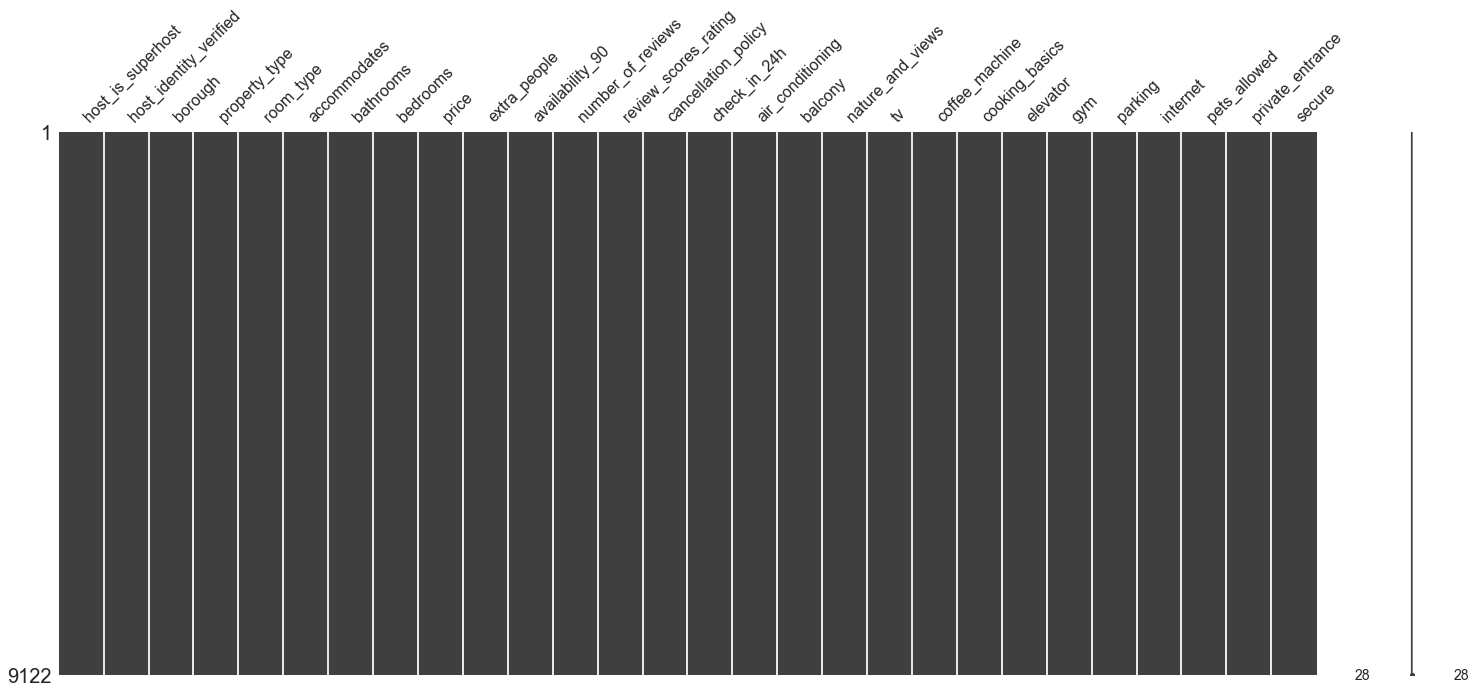

In [80]:
missingno.matrix(df)
df.head(5)

In [81]:
numerical_columns = ['accommodates', 'availability_90', 'extra_people', 'number_of_reviews', 'price']
df_fin = pd.get_dummies(df)


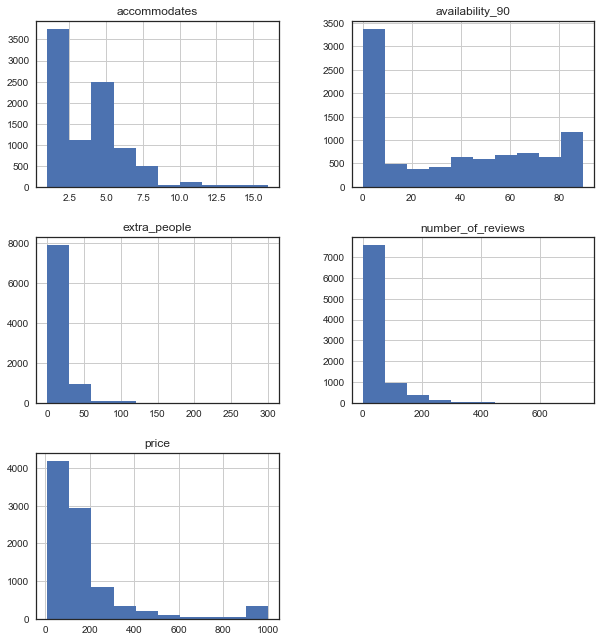

In [82]:
df_fin[numerical_columns].hist(figsize=(10,11));

In [83]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    df_fin[col] = df_fin[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_fin[col] = np.log(df_fin[col])

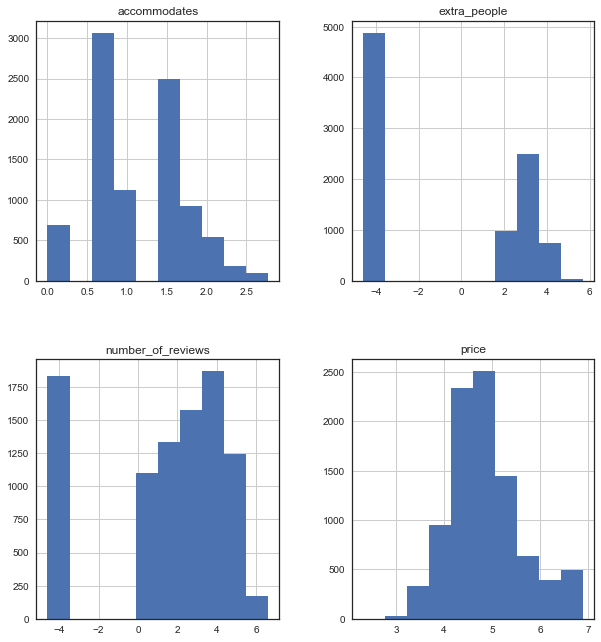

In [84]:
df_fin[numerical_columns].hist(figsize=(10,11));

# 5 Traning Model

In [85]:
# df_fin.info()
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 3344 to 36731350
Data columns (total 75 columns):
host_is_superhost                                                                                            9122 non-null float64
host_identity_verified                                                                                       9122 non-null float64
accommodates                                                                                                 9122 non-null float64
bathrooms                                                                                                    9122 non-null float64
bedrooms                                                                                                     9122 non-null float64
price                                                                                                        9122 non-null float64
extra_people                                                                                        

### 5.1 Set train and test data

In [86]:
X = df_fin.drop('price', axis=1)
y = df_fin.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


### 5.2 Linear Regression

In [87]:
ols_regressor = LinearRegression()
ols_regressor.fit(X_train, y_train)

# displaying coefficients of each feature
y_predict = ols_regressor.predict(X_test)
score = ols_regressor.score(X_train, y_train)
score
print("\nTraining r2:", round(r2_score(y_train,ols_regressor.predict(X_train)),4))
print("Validation r2:", round(r2_score(y_test, ols_regressor.predict(X_test)),4))



Training r2: 0.6053
Validation r2: 0.5792


In [89]:
# 1 feature only linear model
X1 = df_fin.accommodates
# print(X1.shape, type(X1), y1.shape, type(y1))
y1 = df_fin.price
X1 = np.array(X1).reshape(-1,1)
y1 = np.array(y1).reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

# multiple linear regression
ols_regressor = LinearRegression()
ols_regressor.fit(X1_train, y1_train)

# displaying coefficients of each feature
y1_predict = ols_regressor.predict(X1_test)
score1 = ols_regressor.score(X1_test, y1_test)
score1


0.2620643324123797

### 5.3 DecisionTree

In [90]:

dtsin = DecisionTreeRegressor(max_depth=6)
dtsin.fit(X_train, y_train)
print("\nTraining r2:", round(r2_score(y_train,dtsin.predict(X_train)),4))
print("Validation r2:", round(r2_score(y_test, dtsin.predict(X_test)),4))


Training r2: 0.6143
Validation r2: 0.5497


### 5.4 Random Forest

In [91]:

forest = RandomForestRegressor(n_estimators=1000,max_depth=6)
forest.fit(X_train, y_train)
print("\nTraining r2:", round(r2_score(y_train,forest.predict(X_train)),4))
print("Validation r2:", round(r2_score(y_test, forest.predict(X_test)),4))


Training r2: 0.6471
Validation r2: 0.5977


### 5.5 Xgboost

In [92]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)
xgb_reg_end = time.time()
# print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
# print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))


Training r2: 0.6668
Validation r2: 0.6368


In [93]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
"borough_Edgewood, Bloomingdale, Truxton Circle, Eckington",0.000000
"borough_Colonial Village, Shepherd Park, North Portal Estates",0.000000
"borough_Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",0.000000
"borough_Douglas, Shipley Terrace",0.000000
"borough_Eastland Gardens, Kenilworth",0.000000
"borough_Friendship Heights, American University Park, Tenleytown",0.000000
"borough_Hawthorne, Barnaby Woods, Chevy Chase",0.000000
"borough_Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",0.000000
"borough_Kalorama Heights, Adams Morgan, Lanier Heights",0.000000
nature_and_views,0.000000


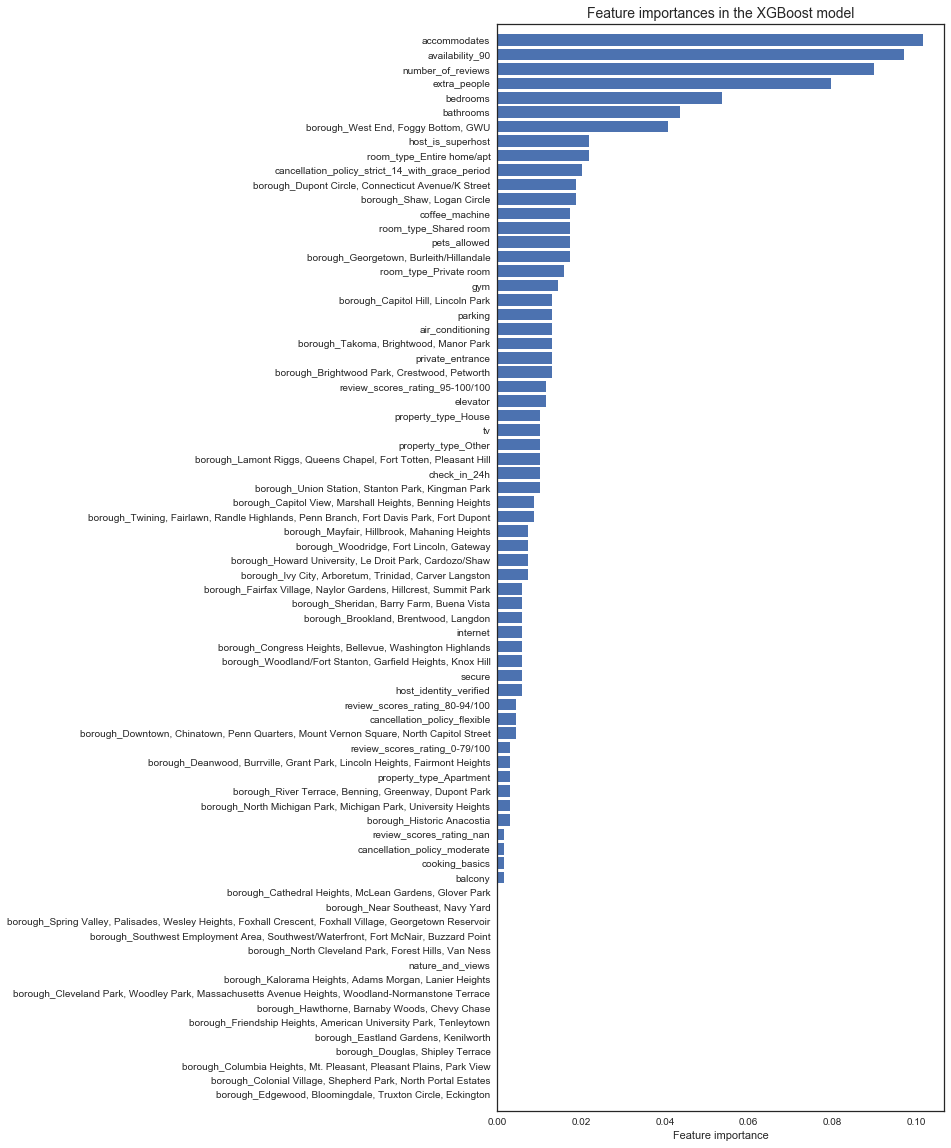

In [94]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [95]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 3344 to 36731350
Data columns (total 75 columns):
host_is_superhost                                                                                            9122 non-null float64
host_identity_verified                                                                                       9122 non-null float64
accommodates                                                                                                 9122 non-null float64
bathrooms                                                                                                    9122 non-null float64
bedrooms                                                                                                     9122 non-null float64
price                                                                                                        9122 non-null float64
extra_people                                                                                        

### 5.6 Neural Network

In [174]:
H = 2 # number of nodes in the layer
input_dim = len(df_fin.columns)-1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(80, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 
# layer 1
model.add(layers.Dense(30, kernel_initializer='normal', 
                activation='relu')) 
# model.add(layers.Dense(20, kernel_initializer='normal', 
#                 activation='relu')) 
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 80)                6000      
_________________________________________________________________
dense_36 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 31        
Total params: 8,461
Trainable params: 8,461
Non-trainable params: 0
_________________________________________________________________
None


In [181]:
df.to_csv("135.csv")
# len(df_fin.columns) # input dimension: just x
# X_train.shape

In [176]:
history=model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test), verbose=1)

Train on 7297 samples, validate on 1825 samples
Epoch 1/20
7297/7297 [==============================] - 1s 159us/step - loss: 8.4677 - val_loss: 0.6776
Epoch 2/20
7297/7297 [==============================] - 0s 32us/step - loss: 0.4976 - val_loss: 0.3618
Epoch 3/20
7297/7297 [==============================] - 0s 35us/step - loss: 0.3472 - val_loss: 0.2852
Epoch 4/20
7297/7297 [==============================] - 0s 35us/step - loss: 0.2940 - val_loss: 0.2550
Epoch 5/20
7297/7297 [==============================] - 0s 33us/step - loss: 0.2640 - val_loss: 0.2390
Epoch 6/20
7297/7297 [==============================] - 0s 34us/step - loss: 0.2525 - val_loss: 0.2462
Epoch 7/20
7297/7297 [==============================] - 0s 33us/step - loss: 0.2391 - val_loss: 0.2254
Epoch 8/20
7297/7297 [==============================] - 0s 34us/step - loss: 0.2341 - val_loss: 0.2261
Epoch 9/20
7297/7297 [==============================] - 0s 33us/step - loss: 0.2296 - val_loss: 0.2258
Epoch 10/20
7297/7297 [=

20


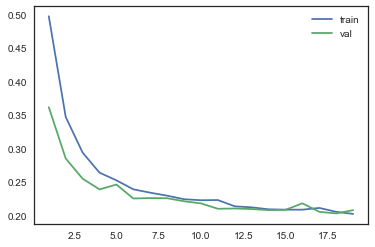

In [177]:
print(len(history.history['loss']))
epochs = np.arange(len(history.history['val_loss']))
plt.plot(epochs[1:], (history.history['loss'][1:]), label='train')
plt.plot(epochs[1:], (history.history['val_loss'][1:]), label='val')
plt.legend()

In [178]:
np.where(history.history['val_loss']==np.min(history.history['val_loss']))

(array([18], dtype=int64),)

In [179]:
print("\nTraining r2:", round(r2_score(y_train, model.predict(X_train)),4))
print("Test r2:", round(r2_score(y_test, model.predict(X_test)),4))


Training r2: 0.6679
Test r2: 0.6295
